In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

/home/holindauer/anaconda3/envs/torch-env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Load Image Data

In [2]:
from dataReader import DataReader

dataReader = DataReader()

dataReader.loadDataset(dataPath="Data")

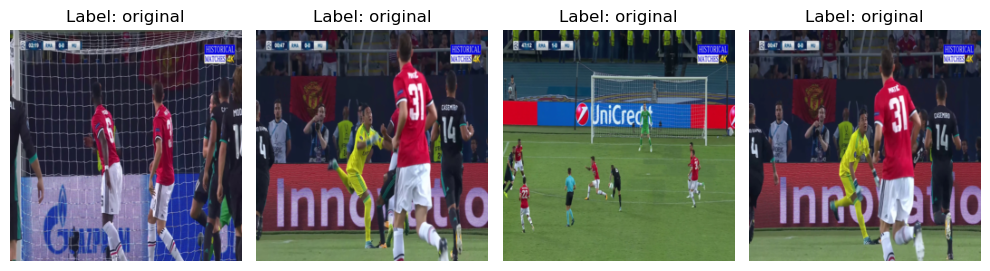

In [3]:

dataReader.plot_examples(num_images=4, class_name="original")

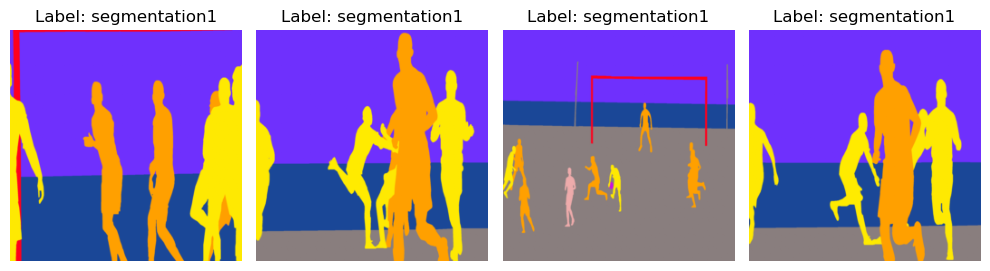

In [4]:

dataReader.plot_examples(num_images=4, class_name="segmentation1")

# Model

In [7]:
from dataclasses import dataclass
from segmentationNet import SegmentationNet
import torch
import torch.nn.functional as F
from torch import nn

# Define the data class for configuration
@dataclass
class SegNetConfig:
    downsampling_channels: list
    upsampling_channels: list
    final_channels: list
    num_classes: int

# Assuming you have already defined ConvDownsamplingBlock, PoolingBlock, UpsampleBlock, and SegmentationNet above

# Example configuration
config = SegNetConfig(
    downsampling_channels=[64, 128, 256],
    upsampling_channels=[256, 128, 64],
    final_channels=[32, 16],
    num_classes=11  # Number of segmentation classes
)

# Instantiate the model with the specified configuration
model = SegmentationNet(config)

# Assuming the input tensor shape is [batch_size, channels, height, width]
# For example, let's assume 1 sample in the batch, 3 input channels (RGB), and an image size of 256x256
input_tensor = torch.randn(1, 3, 256, 256)

# Pass the input tensor through the model to get the output
output = model(input_tensor)

print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {output.shape}")


Input shape: torch.Size([1, 3, 256, 256])
Output shape: torch.Size([1, 11, 256, 256])
